# Predicting services for different customers

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


#### Skills- KNN, Machine Learning, Data Visualization, Data Analysis
#### Libraries- pandas, matplotlib, numpy, scikitlearn, scipy

## Importing Libraries

In [2]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])
await piplite.install(['scipy'])



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

## Load data


In [5]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data Analysis and Visualization

In [7]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


In [9]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [10]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

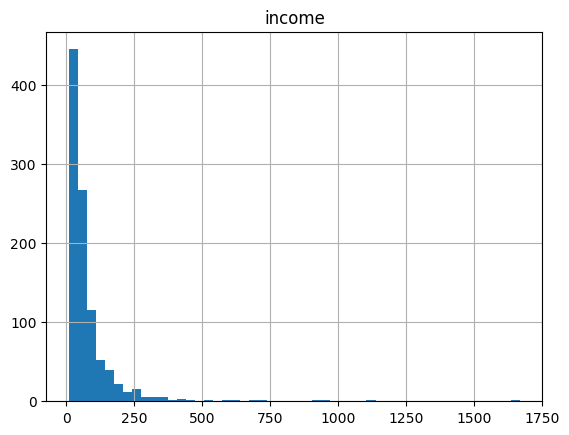

In [11]:
df.hist(column='income', bins=50)

#bins are basically the columns of the histogram

In [12]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

#### converting pandas data frame to  numpy array

In [14]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [15]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Data Normalization

#### Data Standardization gives the data zero mean and unit variance


In [22]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm[0:5]

array([[-1.28618818e+00, -1.53085556e+00, -8.49354628e-01,
         1.00752834e+00, -7.46393214e-01, -4.83608776e-01,
         1.12305195e+00, -7.02283455e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02,  2.51253999e-01,  3.44957012e-01,
         1.00752834e+00,  2.45326718e-01, -2.71543263e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -7.80493639e-01, -6.90113076e-01,
         1.00752834e+00, -5.21892614e-02, -4.92444839e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02, -1.53085556e+00, -3.71629972e-01,
        -9.92527915e-01,  1.46154725e-01, -4.74772713e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01, -9.33814526e-01],
       [ 1.19022709e+00, -2.17722200e-01, -6.10492300e-01,
        -9.92527915e-01, -2.50533248e-01,  2.40948394e-01,
  

## Classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [26]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

array([[-1.13100942, -0.93533648, -0.93817795,  1.02020406, -0.36233308,
         0.17102716, -0.58336825,  0.00666863, -0.21707238, -1.13967126,
         1.97590703],
       [-1.13100942, -1.44823286, -0.13972863, -0.98019606,  0.03474427,
        -0.50017376, -0.58336825, -0.56492821, -0.21707238, -1.13967126,
        -0.90337462],
       [-1.13100942, -0.51569399,  1.53701494,  1.02020406, -0.56087175,
         0.45499678,  0.9619781 , -0.75546048, -0.21707238,  0.87744601,
         1.25608662],
       [-1.13100942, -0.74882871, -0.85833302,  1.02020406, -1.15648777,
        -0.70669712,  0.9619781 , -0.85072662, -0.21707238, -1.13967126,
         0.53626621],
       [-1.13100942,  0.51009876, -1.01802288,  1.02020406, -0.75941043,
         0.17102716,  1.73465128, -0.75546048, -0.21707238, -1.13967126,
         1.25608662]])

In [27]:
yhat = neigh.predict(X_test_norm)
yhat[0:5]

array([3, 1, 3, 2, 4], dtype=int64)

## Evaluation

In [29]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.33


In [30]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
yhat6 = neigh6.predict(X_test_norm)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.5125
Test set Accuracy:  0.335


In [31]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm,y_train)
    yhat=neigh.predict(X_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.32 , 0.315, 0.335, 0.33 , 0.34 , 0.335, 0.35 , 0.34 , 0.335])

## Plotting Model Accuracy

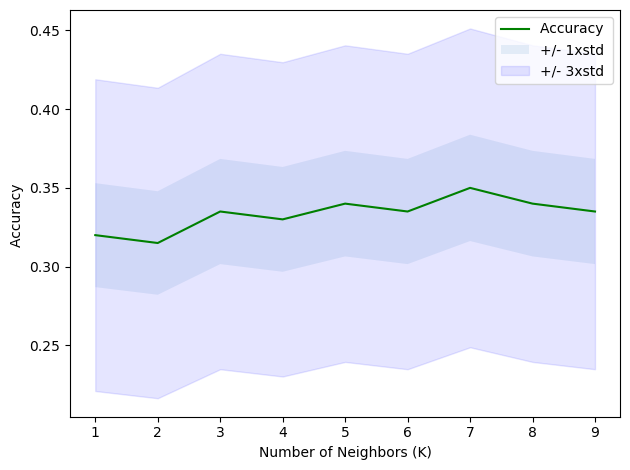

In [39]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [40]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.35 with k= 7
